<h1><center>Assignment 2 </center></h1>
<h2><center> SC9502B </center></h2>
<h3><center> Yasamin Modabber </center></h3>
<link rel="stylesheet" type="text/css" href="./text.css">

In [109]:
import time
import matplotlib.pyplot as plt

$\textbf{Question 1:}$ Equation 1.4 that defines the Fibonacci sequence is very simple. It is, however, a recursive and thus computationally expensive. Write a code that is a direct straightforward implementation of Equation 1.4. Determine the time complexity (O(n)) of the function you wrote. Plot n vs t (t=time). Repeat the calculation at least 10 times to obtain error bars and include error bars in your plot. Remember to explain how your error bars were determined. What was the largest n you could compute within reasonable time (report the type of processor you are using).

Text(0, 0.5, 't(n) [s]')

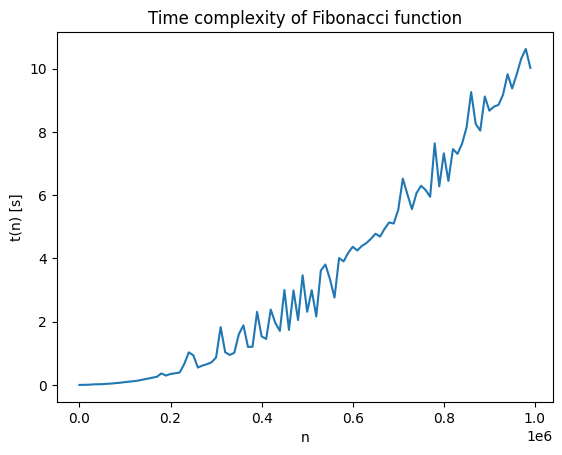

In [118]:
# Part 1: The Fibonacci function
def Fibonacci(n):
    x0=0
    x1=1
    if n==0:
        return x0
    elif n==1:
        return x1
    else:
        for i in range(2,n+1):
            x=x0+x1
            x0=x1
            x1=x
        return x

#Part 2: The time complexity function
def Time_complexity(n):
    time1=time.time()
    Fibonacci(n)
    time2=time.time()
    return time2-time1


#Part 3: Plotting time complexity(O(n)) as a function of n
n = [i for i in range(0,1000000,10000)]
time_complexity = [Time_complexity(i) for i in n]
plt.title('Time complexity of Fibonacci function')
plt.plot(n , time_complexity)
plt.xlabel('n')
plt.ylabel('t(n) [s]')

To include the errorbars, I have calculated the standard deviation of the data corresponding to each n, and used that to represent the variability and uncretrainty in the data.

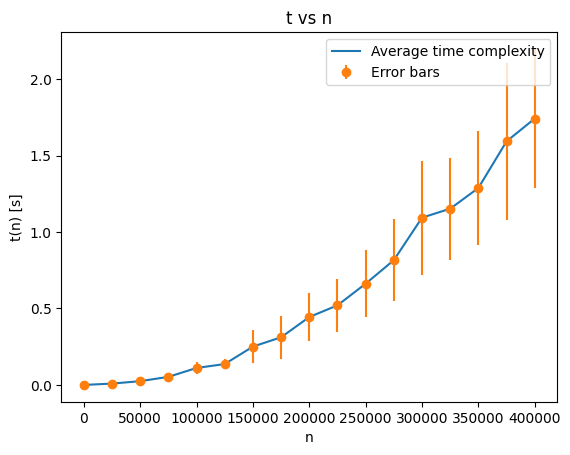

In [116]:
#Part 4: The standard deviation function to find the error bars
def Std_dev(data):
    N=len(data)
    var = 0
    for i in range(N):
        for j in range(N):
            if i<j:
                var += (data[i]-data[j])**2
    var = var/(N**2)
    Std_dev = var**0.5
    return Std_dev

#repeat the calculation 10 times and plot the average time complexity + error bars

n = [i for i in range(0,400001,25000)]
t = []
for i in n:
    t.append([Time_complexity(i) for _ in range(20)])
t_av = [sum(i)/len(i) for i in t]
err_bar = [Std_dev(i) for i in t]
plt.title("t vs n")
plt.plot(n, t_av, label='Average time complexity')
plt.errorbar(n, t_av, yerr=err_bar, fmt='o', label='Error bars')
plt.xlabel('n')
plt.ylabel('t(n) [s]')
plt.legend()

If we set the resonable time to be less than 1 seconds, that would correspond to an n $\approx$ 300000

processor information:
Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, 1992 Mhz , 4 Cores , 8 logical Processors

$\textbf{Question 2:}$ Write a simple python code that uses the current time as the seed for an LCG. Then, use the different seeds (and remember to record them in your plots!) and analyze the random number sequences generated. Do the sequences appear random and depend on the seed?

Text(0, 0.5, 'Frequency')

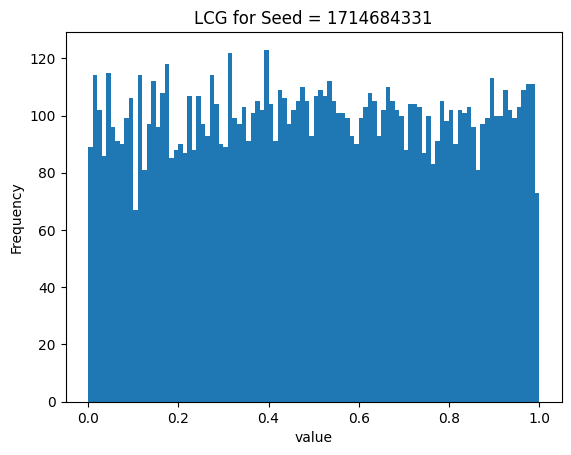

In [99]:
# LCG function from the lecture notes
def LCG(seed, a , c , m , n):
    x = seed
    numbers = []
    for _ in range(n):
        x = (a*x + c) % m
        numbers.append(x/m) # scaled by m
    return numbers

#Part 1: Initialize the LCG parameters
seed = int(time.time())
a = 1664525
c = 1013904223
m = 2**32
n = 10000

#Part 2: Ploting the Random numbers
numbers = LCG(seed, a, c, m, n)
plt.title("LCG for Seed = {}".format(seed))
plt.hist(numbers, bins=100)
plt.xlabel('value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

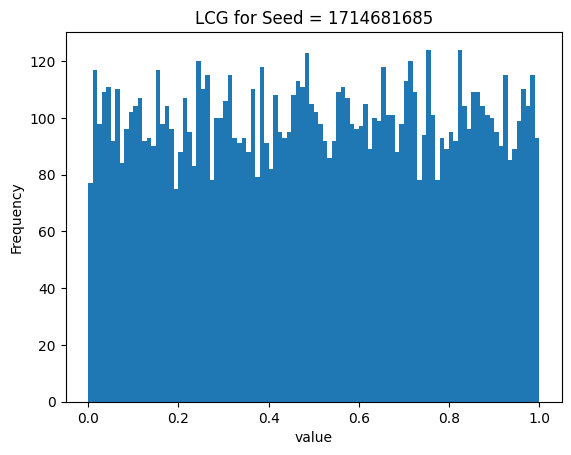

In [67]:
seed = int(time.time())
numbers = LCG(seed, a, c, m, n)
plt.title("LCG for Seed = {}".format(seed))
plt.hist(numbers, bins=100)
plt.xlabel('value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

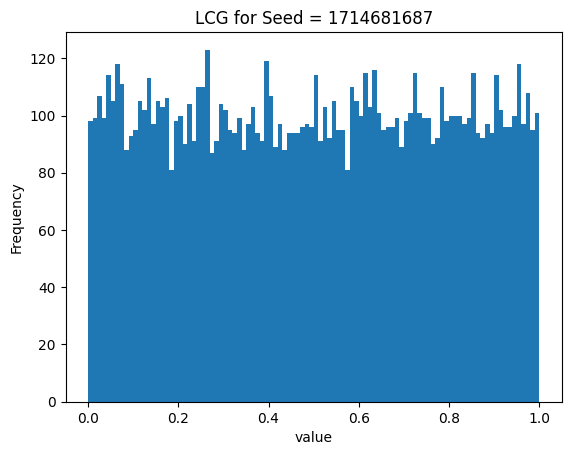

In [68]:
seed = int(time.time())
numbers = LCG(seed, a, c, m, n)
plt.title("LCG for Seed = {}".format(seed))
plt.hist(numbers, bins=100)
plt.xlabel('value')
plt.ylabel('Frequency')

Yes, when we plot the distribution of random numbers for a small Population, we can notice the difference in the distribution depending on different seeds. 

$\textbf{Question 3:}$ Experiment with different multipliers and moduli. How do the choices of a and m affect the sequence?

First we start by finding some different choces for a, m and c that satisfy the Hull-Dobell theorem for which we have a period equal to m.

For $m = 2^{32}$ and $c = 1013904223$  we can have $a_1 = 97557$, $a_2 = 24893$, $a_3 = 1664525$

For $a = 1664525$ and $c = 1013904223$ we can have $m_1 = 2^{16} $, $m_2 = 2^{24}$, $m_3 = 2^{32}$

For $a = 1664525$ and $m = 2^{32}$ we can have $c_1 = 7$, $c_2 = 3829$, and $c=1013904223$

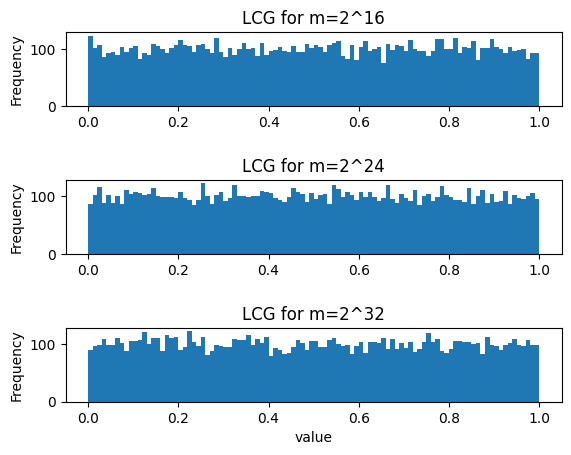

In [100]:
seed = int(time.time())
c = 1013904223
n = 10000
a = 1664525
m = 2**32
m1=2**16
m2=2**24
m3= m
a1= 24893
a2= 97557
a3= a
c1= 7
c2= 3829
c3= c

# using different values for m
numbers_m1 = LCG(seed, a, c, m1, n)
numbers_m2 = LCG(seed, a, c, m2, n)
numbers_m3 = LCG(seed, a, c, m3, n)


fig , (ax1,ax2,ax3) = plt.subplots(3)

ax1.hist(numbers_m1, bins=100 , label='m=2^16') 
ax2.hist(numbers_m2, bins=100 , label='m=2^24')
ax3.hist(numbers_m3, bins=100  , label='m=2^32')

ax1.title.set_text("LCG for m=2^16")
ax2.title.set_text("LCG for m=2^24")
ax3.title.set_text("LCG for m=2^32")

ax3.set_xlabel('value')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')
ax3.set_ylabel('Frequency')

plt.subplots_adjust(hspace=1)

Changing m affects the period of the data. Here we have scaled the values to be in the range [0,1] so the difference is not evident, but it is more desirable to have longer periods because smaller chices of m may lead to correlation in our data.

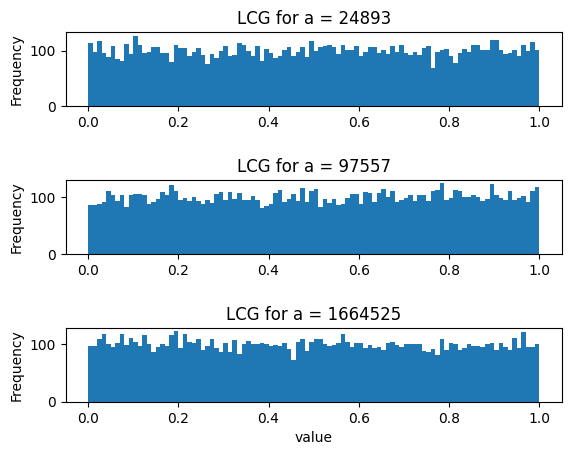

In [85]:
#using different values for a
numbers_a1 = LCG(seed, a1, c, m, n)
numbers_a2 = LCG(seed, a2, c, m, n)
numbers_a3 = LCG(seed, a3, c, m, n)

fig , (ax1,ax2,ax3) = plt.subplots(3)
ax1.hist(numbers_a1, bins=100 , label='a=24893')
ax2.hist(numbers_a2, bins=100 , label='a=97557')
ax3.hist(numbers_a3, bins=100 , label='a=1664525')

ax1.title.set_text("LCG for a = 24893")
ax2.title.set_text("LCG for a = 97557")
ax3.title.set_text("LCG for a = 1664525")

ax3.set_xlabel('value')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')
ax3.set_ylabel('Frequency')

plt.subplots_adjust(hspace=1)

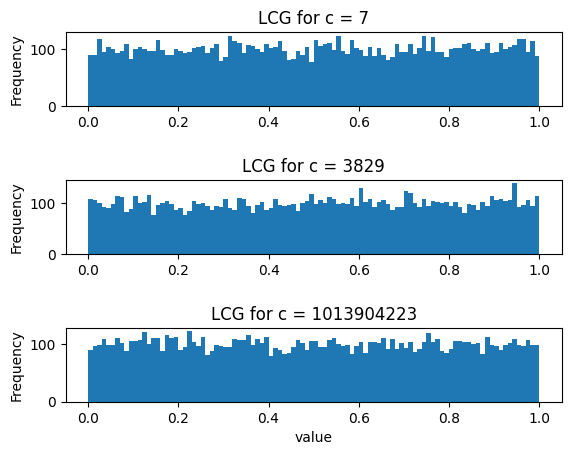

In [101]:
numbers_c1 = LCG(seed, a, c1, m, n)
numbers_c2 = LCG(seed, a, c2, m, n)
numbers_c3 = LCG(seed, a, c3, m, n)

fig , (ax1,ax2,ax3) = plt.subplots(3)

ax1.hist(numbers_c1, bins=100 , label='c=7')
ax2.hist(numbers_c2, bins=100 , label='c=3829')
ax3.hist(numbers_c3, bins=100 , label='c=1013904223')

ax1.title.set_text("LCG for c = 7")
ax2.title.set_text("LCG for c = 3829")
ax3.title.set_text("LCG for c = 1013904223")

ax3.set_xlabel('value')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')
ax3.set_ylabel('Frequency')

plt.subplots_adjust(hspace=1)

All these choices for a, c, and m that follow the Hull-Dobell theorem create good distributions of random nubmers with period equal to m, while for those that do not follow it we see behaviors such as:

Text(0, 0.5, 'Frequency')

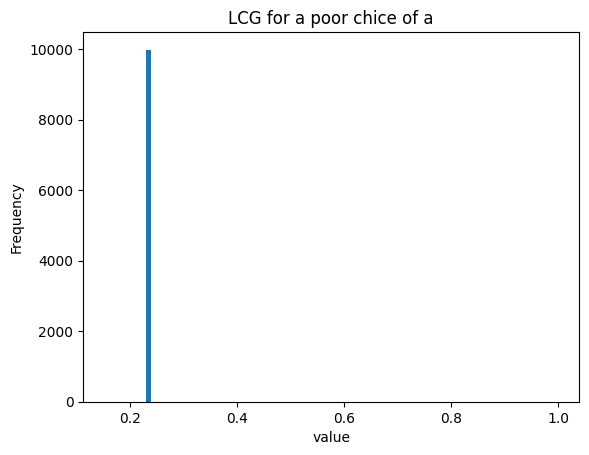

In [102]:
numbers_bad_a = LCG(seed, 416132, c1, m, n)
plt.title("LCG for a poor chice of a")
plt.hist(numbers_bad_a, bins=100) #a-1 not divisable by 4
plt.xlabel('value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

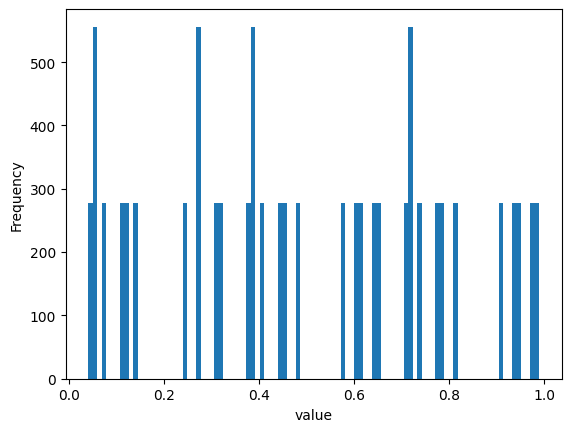

In [104]:
numbers_bad_am = LCG(seed, 128 , c, 7560, n)
plt.hist(numbers_bad_am, bins=100) # a-1 not divisable by prime factors of m
plt.xlabel('value')
plt.ylabel('Frequency')

$\textbf{Question 4:}$ Apply simple statistical tests (mean, variance) to the sequences. Do they conform to expectations for pseudorandom numbers?

In [107]:
import numpy as np

#get mean and std deviation of the different LCGs
mean_m1 = np.mean(numbers_m1)
mean_m2 = np.mean(numbers_m2)
mean_m3 = np.mean(numbers_m3)
print("Mean for m=2^16, m=2^24, m=2^32")
print(mean_m1, mean_m2, mean_m3)
mean_a1 = np.mean(numbers_a1)
mean_a2 = np.mean(numbers_a2)
mean_a3 = np.mean(numbers_a3)
print("Mean for a=24893, a=97557, a=1664525")
print(mean_a1, mean_a2, mean_a3)
mean_c1 = np.mean(numbers_c1)
mean_c2 = np.mean(numbers_c2)
mean_c3 = np.mean(numbers_c3)
print("Mean for c=7, c=3829, c=1013904223")
print(mean_c1, mean_c2, mean_c3)

# variance
var_m1 = np.var(numbers_m1)
var_m2 = np.var(numbers_m2)
var_m3 = np.var(numbers_m3)
print("Variance for m=2^16, m=2^24, m=2^32")
print(var_m1, var_m2, var_m3)
var_a1 = np.var(numbers_a1)
var_a2 = np.var(numbers_a2)
var_a3 = np.var(numbers_a3)
print("Variance for a=24893, a=97557, a=1664525")
print(var_a1, var_a2, var_a3)
var_c1 = np.var(numbers_c1)
var_c2 = np.var(numbers_c2)
var_c3 = np.var(numbers_c3)
print("Variance for c=7, c=3829, c=1013904223")
print(var_c1, var_c2, var_c3)

Mean for m=2^16, m=2^24, m=2^32
0.5000485229492188 0.49807362704277036 0.4970436469806358
Mean for a=24893, a=97557, a=1664525
0.5018839950049296 0.5062520859533921 0.4943359286690131
Mean for c=7, c=3829, c=1013904223
0.5038755952028557 0.505506777981855 0.4970436469806358
Variance for m=2^16, m=2^24, m=2^32
0.0828345740039833 0.08256105088675612 0.08400160977224591
Variance for a=24893, a=97557, a=1664525
0.08405333388956573 0.08351334676115882 0.08412797040347123
Variance for c=7, c=3829, c=1013904223
0.08366924311068653 0.08395356985439617 0.08400160977224591


For all cases, the mean of the distribution should converge to the expected mean of a uniform distribution between 0 and 1, which would be 0.5.

As for variance, it should converge to the expected variance of a uniform distribution between 0 and 1, which would be 1/12. 

We see that happening for all good choices of parameters.

Now for the bad choice of parameters that is not the case and we see:

In [108]:
# For the bad choices of parameters
mean_bad_a = np.mean(numbers_bad_a)
print("Mean for bad choice of a :" , mean_bad_a)
mean_bad_am = np.mean(numbers_bad_am)
print("Mean for bad choice of a and m :" , mean_bad_am)

var_bad_a = np.var(numbers_bad_a)
print("Variance for bad choice of a :" , var_bad_a)
var_bad_am = np.var(numbers_bad_am)
print("Variance for bad choice of a and m :" , var_bad_am)

Mean for bad choice of a 0.23795894716298208
Mean for bad choice of a and m 0.5013518518518518
Variance for bad choice of a 0.0003130505882944213
Variance for bad choice of a and m 0.08483985106100053


$\textbf{Question 5:}$ Are the following pairs coprimes? 

a) 15 and 25

No, their GCD is equal to 5

b) 8 and 15 

Yes

c) 9 and 16

Yes

$\textbf{Question 6:}$ Consider an LCG with m = 16, a = 5, and c = 3. Check if it satisfies the Hull-Dobell Theorem.

The Hull-Dobell Theorem imposes three conditions on a, c, and m:

1. Condition on c: The increment c must be relatively prime (or coprime) to the modulus m. This means that c and m share no common factors other than 1.
2. Condition on a: a – 1 is divisible by all prime factors of m.
3. Condition for even modulus: If m is a multiple of 4, then a - 1 should be divisible by 4.


a) Here condition 1 is met, since m=16 and c=3 are coprimes.

b) The prime factor of m is 2, and a-1 = 4 is divisable by 2 so condition 2 is met as well.

c) m is a multiple of 4, and a-1 = 4 is divisable by 4 so condition 3 is met as well. 

Text(0, 0.5, 'Frequency')

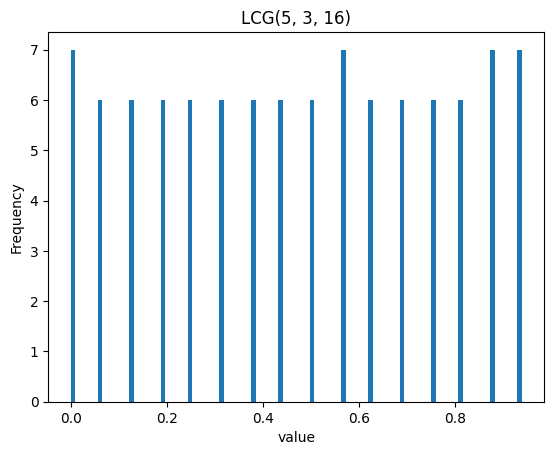

In [66]:
seed = int(time.time())
a = 5
c = 3
m = 16
n = 100

#Part 2: Ploting the Random numbers
numbers = LCG(seed, a, c, m, n)
plt.title("LCG(5, 3, 16)".format(seed))
plt.hist(numbers, bins=100)
plt.xlabel('value')
plt.ylabel('Frequency')

based on the distribution of the random numbers, we can see that this choice of parameters is not ideal since for m=16 it has a small period and generates 16 different outcomes, nonetheless it works fine and follows the Hull-Dobell conditions.